In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)

# Présentation du dataset

#### Lien du dataset
https://www.kaggle.com/shrutimehta/nasa-asteroids-classification

In [3]:
df_nasa = pd.read_csv("csv_files/nasa.csv")

df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [4]:
df_nasa.shape

(4687, 40)

# Partie 1 : Analyse graphique des données

## 1-1 : Suppression des valeurs "doublons"
#### Exemple : Distances indiquées en KM, Mètre, Miles et Feet, qui correspondent à la même donnée mais avec une unité différente

### Suppression également des colonnes Equinox et Orbiting Body qui possèdent une valeur unique pour toutes les lignes

In [5]:
nasa = df_nasa.drop(['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', "Relative Velocity km per sec", "Equinox", "Orbiting Body"], axis="columns")

nasa.shape

(4687, 28)

In [6]:
nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Neo Reference ID             4687 non-null   int64  
 1   Name                         4687 non-null   int64  
 2   Absolute Magnitude           4687 non-null   float64
 3   Est Dia in Miles(min)        4687 non-null   float64
 4   Est Dia in Miles(max)        4687 non-null   float64
 5   Close Approach Date          4687 non-null   object 
 6   Epoch Date Close Approach    4687 non-null   int64  
 7   Relative Velocity km per hr  4687 non-null   float64
 8   Miles per hour               4687 non-null   float64
 9   Miss Dist.(miles)            4687 non-null   float64
 10  Orbit ID                     4687 non-null   int64  
 11  Orbit Determination Date     4687 non-null   object 
 12  Orbit Uncertainity           4687 non-null   int64  
 13  Minimum Orbit Inte

## 1-2 : Renommage des colonnes
On renomme ici les colonnes afin qu'elles n'aient plus d'espaces dans les noms

In [7]:
nasa = nasa
for (colName, colData) in nasa.iteritems():
    nasa = nasa.rename(columns={colName :colName.replace(" ", "")})


nasa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NeoReferenceID             4687 non-null   int64  
 1   Name                       4687 non-null   int64  
 2   AbsoluteMagnitude          4687 non-null   float64
 3   EstDiainMiles(min)         4687 non-null   float64
 4   EstDiainMiles(max)         4687 non-null   float64
 5   CloseApproachDate          4687 non-null   object 
 6   EpochDateCloseApproach     4687 non-null   int64  
 7   RelativeVelocitykmperhr    4687 non-null   float64
 8   Milesperhour               4687 non-null   float64
 9   MissDist.(miles)           4687 non-null   float64
 10  OrbitID                    4687 non-null   int64  
 11  OrbitDeterminationDate     4687 non-null   object 
 12  OrbitUncertainity          4687 non-null   int64  
 13  MinimumOrbitIntersection   4687 non-null   float

## 1-3 : Nettoyage des données vides
On constate ici qu'aucun NAN n'est présent dans notre dataset

In [8]:

nasa.isna().sum()

NeoReferenceID               0
Name                         0
AbsoluteMagnitude            0
EstDiainMiles(min)           0
EstDiainMiles(max)           0
CloseApproachDate            0
EpochDateCloseApproach       0
RelativeVelocitykmperhr      0
Milesperhour                 0
MissDist.(miles)             0
OrbitID                      0
OrbitDeterminationDate       0
OrbitUncertainity            0
MinimumOrbitIntersection     0
JupiterTisserandInvariant    0
EpochOsculation              0
Eccentricity                 0
SemiMajorAxis                0
Inclination                  0
AscNodeLongitude             0
OrbitalPeriod                0
PerihelionDistance           0
PerihelionArg                0
AphelionDist                 0
PerihelionTime               0
MeanAnomaly                  0
MeanMotion                   0
Hazardous                    0
dtype: int64

In [9]:
nasa.sample(5)

,NeoReferenceID,Name,AbsoluteMagnitude,EstDiainMiles(min),EstDiainMiles(max),CloseApproachDate,EpochDateCloseApproach,RelativeVelocitykmperhr,Milesperhour,MissDist.(miles),OrbitID,OrbitDeterminationDate,OrbitUncertainity,MinimumOrbitIntersection,JupiterTisserandInvariant,EpochOsculation,Eccentricity,SemiMajorAxis,Inclination,AscNodeLongitude,OrbitalPeriod,PerihelionDistance,PerihelionArg,AphelionDist,PerihelionTime,MeanAnomaly,MeanMotion,Hazardous
3485,3614980,3614980,20.7,0.119648,0.267541,2012-11-08,1352361600000,111116.875900,69043.705472,5950547.0,19,2017-04-06 08:48:19,0,0.003336,3.003,2458000.5,0.855311,2.238733,3.219758,287.724901,1223.494350,0.323920,238.106768,4.153547,2.457505e+06,145.819917,0.294239,True
295,3745113,3745113,26.1,0.009952,0.022253,1996-12-22,851241600000,58865.331592,36576.627844,38202476.0,8,2017-04-06 08:27:48,6,0.029105,6.697,2458000.5,0.229795,0.877982,15.572641,166.600952,300.487697,0.676226,145.581248,1.079738,2.457862e+06,166.412726,1.198052,False
3675,3613392,3613392,24.1,0.024998,0.055897,2013-08-08,1375945200000,28694.788316,17829.825551,36292168.0,11,2017-04-06 08:48:22,6,0.005379,5.646,2458000.5,0.280629,1.090970,4.219583,50.462336,416.214835,0.784812,93.284974,1.397128,2.457982e+06,15.888745,0.864938,False
3113,3384113,3384113,19.0,0.261762,0.585317,2011-06-08,1307516400000,50158.649711,31166.634316,34909396.0,16,2017-04-06 09:06:06,1,0.234375,3.978,2458000.5,0.586112,1.665482,21.311933,163.984866,785.069872,0.689323,24.652726,2.641641,2.458035e+06,344.407349,0.458558,False
3836,3600563,3600563,23.0,0.041486,0.092766,2014-02-22,1393056000000,66434.238259,41279.652101,31885390.0,10,2017-04-06 08:50:37,6,0.061459,7.297,2458000.5,0.356372,0.780426,29.517641,345.510291,251.823224,0.502304,352.232364,1.058547,2.458125e+06,182.477254,1.429574,False


In [43]:

nasa.groupby(by="Hazardous")["Hazardous"].count()

Hazardous
False    3932
True      755
Name: Hazardous, dtype: int64

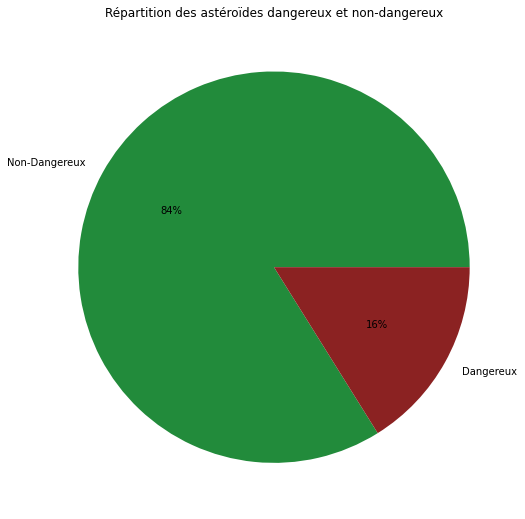

In [72]:
values = nasa.groupby(by="Hazardous")["Hazardous"].count()
plt.subplots(figsize=(12, 9))
plt.pie(values, labels=["Non-Dangereux", "Dangereux"], autopct='%1.0f%%', colors=["#228b3b", "#8b2222"]
)
plt.title("Répartition des astéroïdes dangereux et non-dangereux")

plt.show()

## 1-3 : Encodage des données

### Avec LabelEncoder

In [293]:
nasa = nasa.apply(LabelEncoder().fit_transform)

nasa.shape
nasa.sample(5)

,NeoReferenceID,Name,AbsoluteMagnitude,EstDiainMiles(min),EstDiainMiles(max),CloseApproachDate,EpochDateCloseApproach,RelativeVelocitykmperhr,Milesperhour,MissDist.(miles),OrbitID,OrbitDeterminationDate,OrbitUncertainity,MinimumOrbitIntersection,JupiterTisserandInvariant,EpochOsculation,Eccentricity,SemiMajorAxis,Inclination,AscNodeLongitude,OrbitalPeriod,PerihelionDistance,PerihelionArg,AphelionDist,PerihelionTime,MeanAnomaly,MeanMotion,Hazardous
1359,312,312,77,191,191,295,295,1234,1234,1091,41,2058,0,1745,1150,427,2026,1988,502,708,1988,1585,1894,2074,2591,3078,1703,1
3391,381,381,36,232,232,627,627,3354,3354,951,88,2019,0,1312,90,427,3433,3607,1001,1118,3607,1860,2492,3610,903,624,84,1
4569,1839,1839,143,125,125,764,764,1565,1565,726,39,1167,0,2037,1640,427,398,1199,2516,2572,1199,2247,2820,906,1403,1032,2492,0
3446,1483,1483,143,125,125,634,634,4354,4354,3546,7,1385,8,1308,2196,105,584,280,3609,3461,280,1083,277,101,99,1458,3411,0
3833,468,468,75,193,193,685,685,462,462,4506,49,1975,0,1562,998,427,1433,2254,331,1432,2254,2718,1003,2124,3064,2716,1437,1


## 1-3 : Heatmap avec matrice de correlation

#### Ici on retire plusieurs colonnes pour la matrice de correlation, étant les moins importantes de par le peu de correlation qu'elles impliquent : Améliore la lisibilité des variables correllées

### On pourra également voir plus tard à l'aide de la Feature Importance si l'on retrouve ces mêmes variables

<AxesSubplot:>

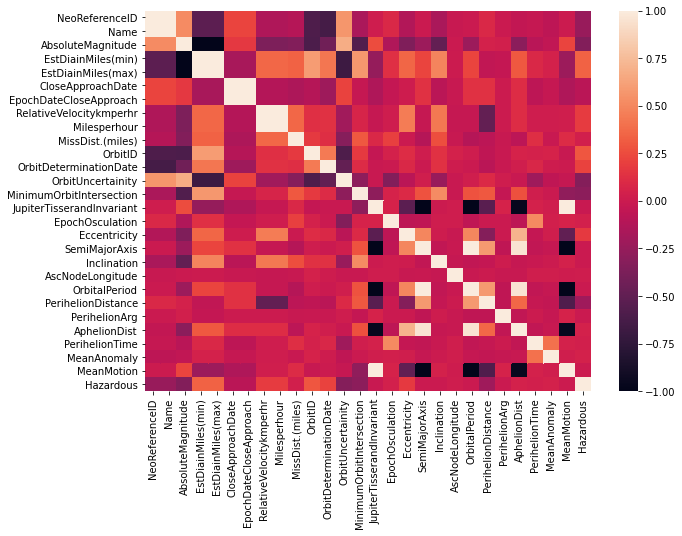

In [294]:
corr = nasa.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(corr)

<AxesSubplot:>

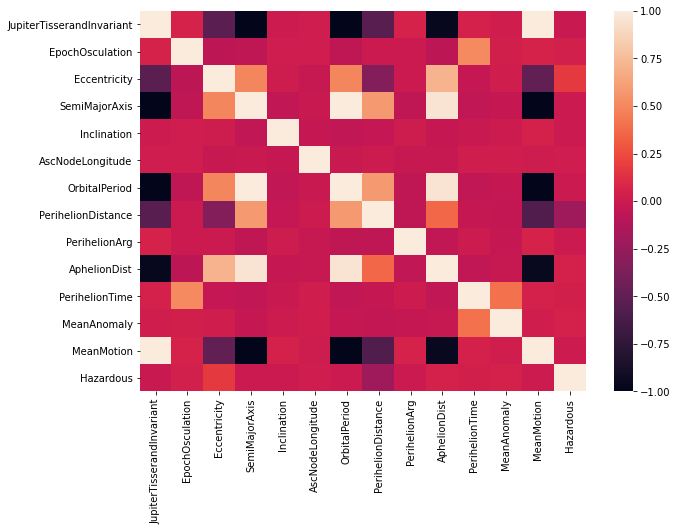

In [295]:
plt.subplots(figsize=(10,7))


correlation_nasa = nasa.drop(["NeoReferenceID", 'Name', "AbsoluteMagnitude", "EstDiainMiles(min)", "EstDiainMiles(max)", "CloseApproachDate", "EpochDateCloseApproach","RelativeVelocitykmperhr", "Milesperhour", "MissDist.(miles)", "OrbitID", "OrbitDeterminationDate", "OrbitUncertainity", "MinimumOrbitIntersection"], axis="columns").corr()
sns.heatmap(correlation_nasa)

<AxesSubplot:xlabel='Hazardous', ylabel='Eccentricity'>

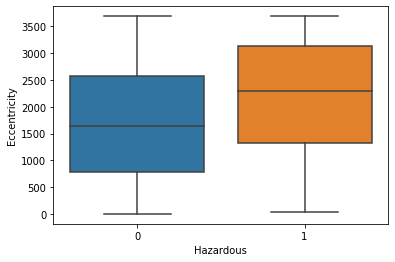

In [297]:
sns.boxplot(data=nasa, x="Hazardous", y="Eccentricity")

In [74]:
nasa.columns

Index(['NeoReferenceID', 'Name', 'AbsoluteMagnitude', 'EstDiainMiles(min)',
       'EstDiainMiles(max)', 'CloseApproachDate', 'EpochDateCloseApproach',
       'RelativeVelocitykmperhr', 'Milesperhour', 'MissDist.(miles)',
       'OrbitID', 'OrbitDeterminationDate', 'OrbitUncertainity',
       'MinimumOrbitIntersection', 'JupiterTisserandInvariant',
       'EpochOsculation', 'Eccentricity', 'SemiMajorAxis', 'Inclination',
       'AscNodeLongitude', 'OrbitalPeriod', 'PerihelionDistance',
       'PerihelionArg', 'AphelionDist', 'PerihelionTime', 'MeanAnomaly',
       'MeanMotion', 'Hazardous'],
      dtype='object')

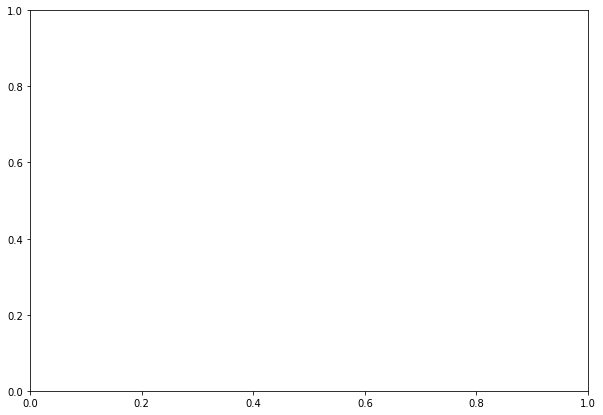

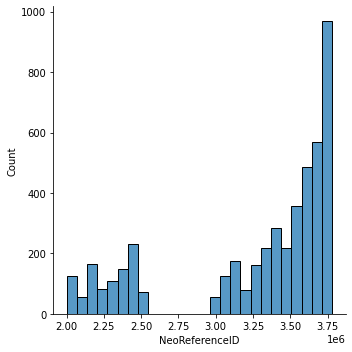

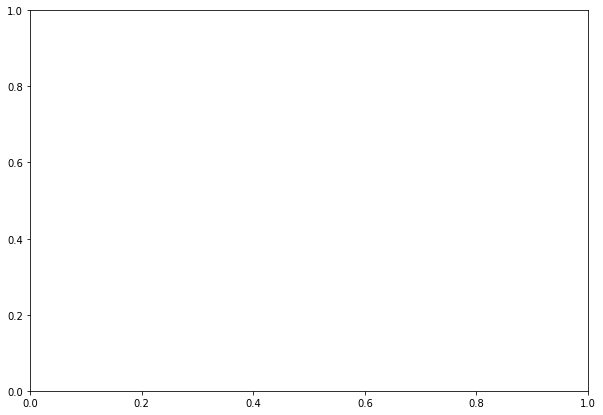

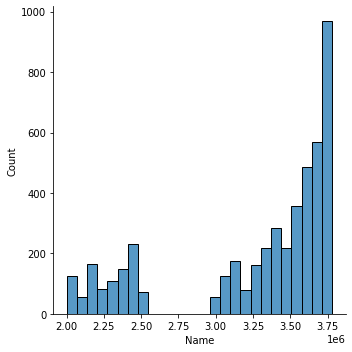

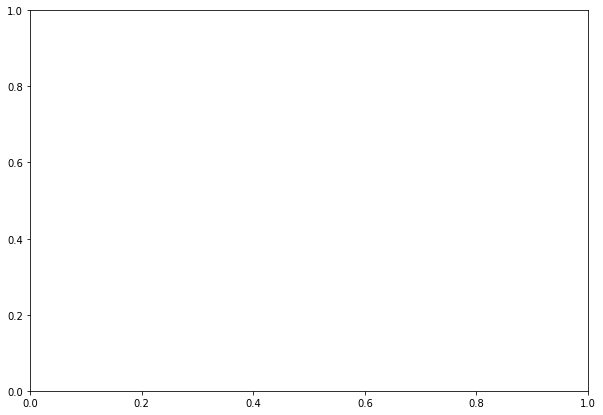

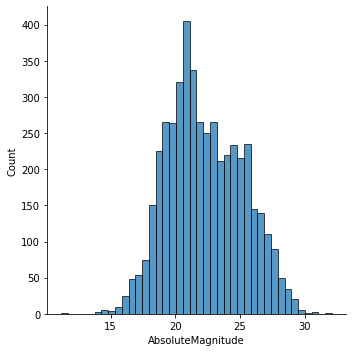

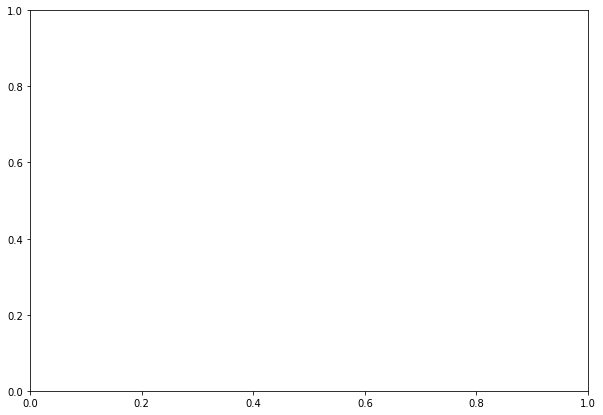

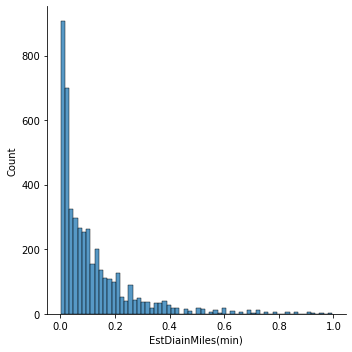

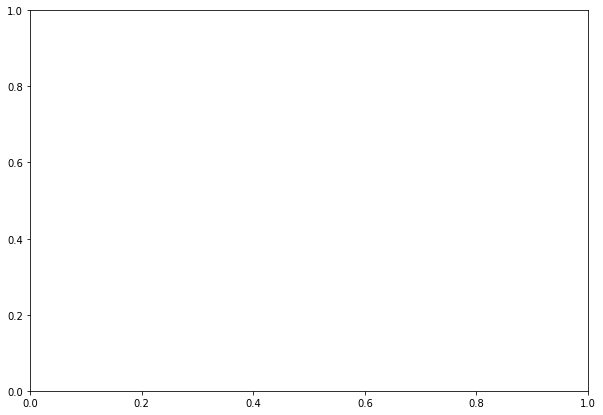

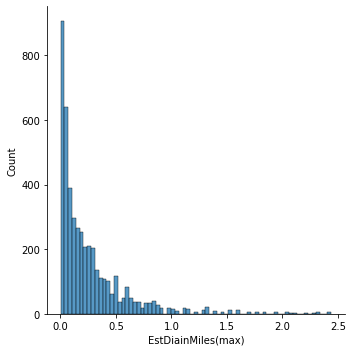

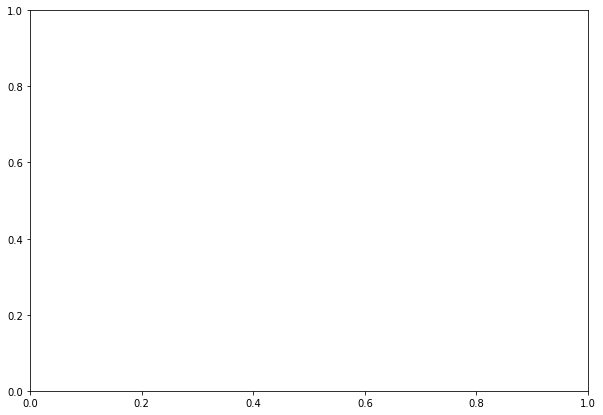

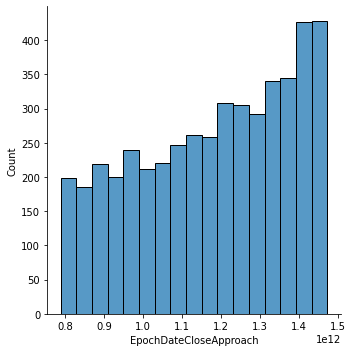

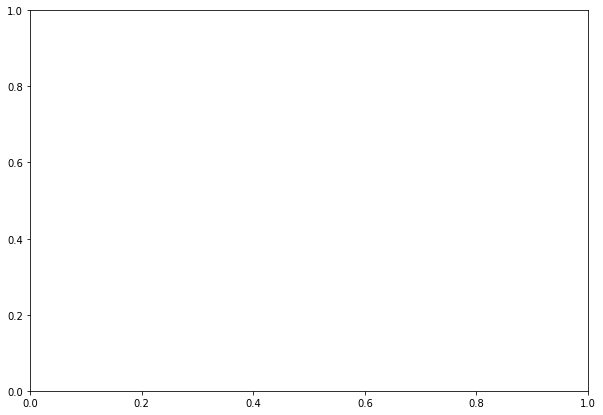

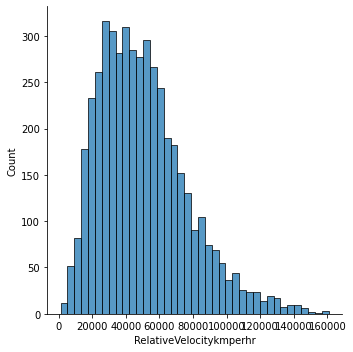

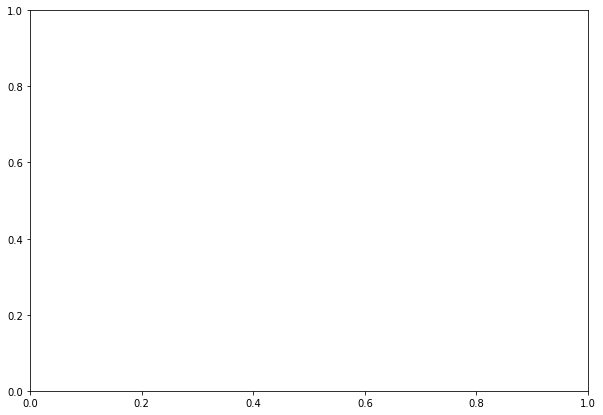

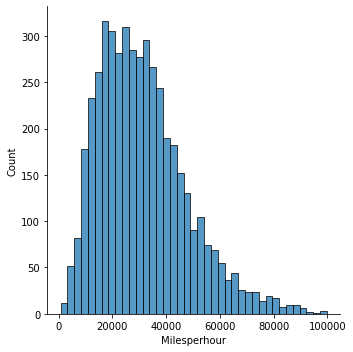

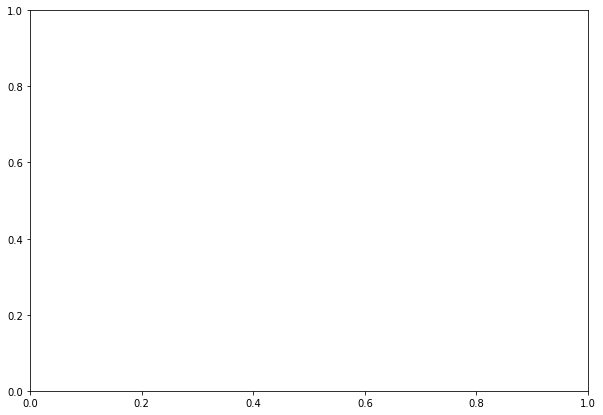

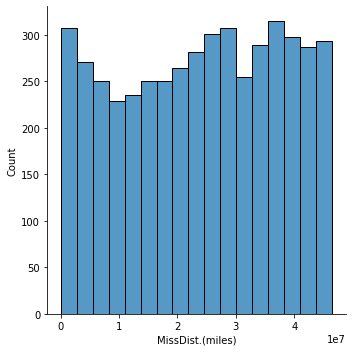

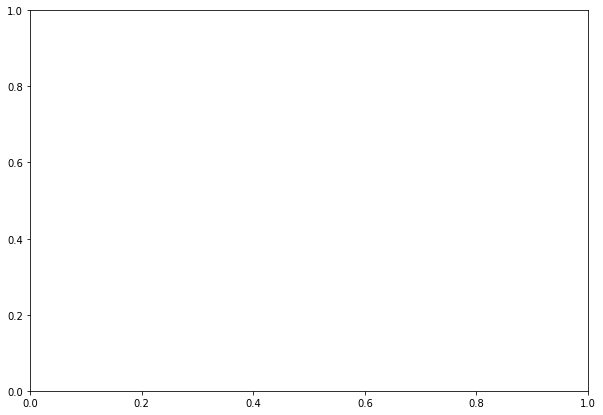

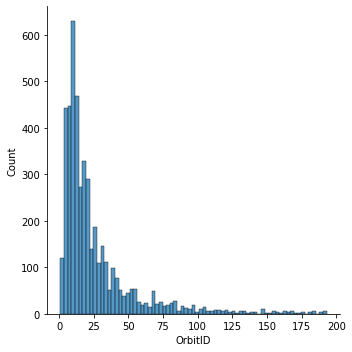

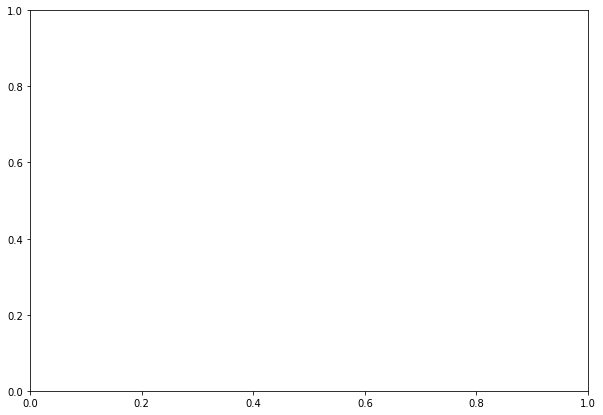

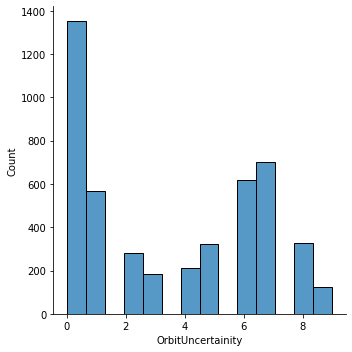

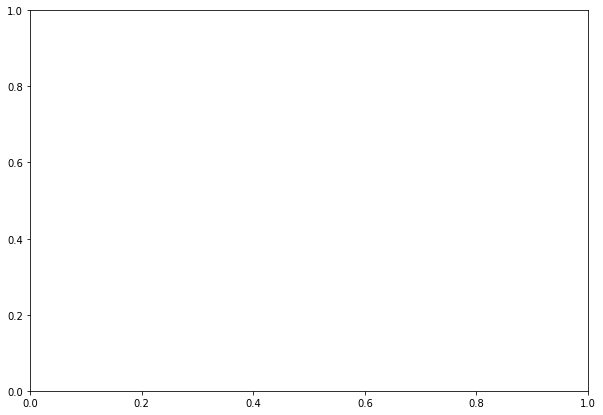

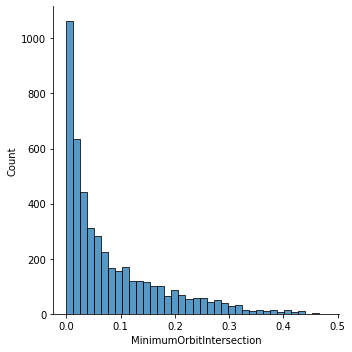

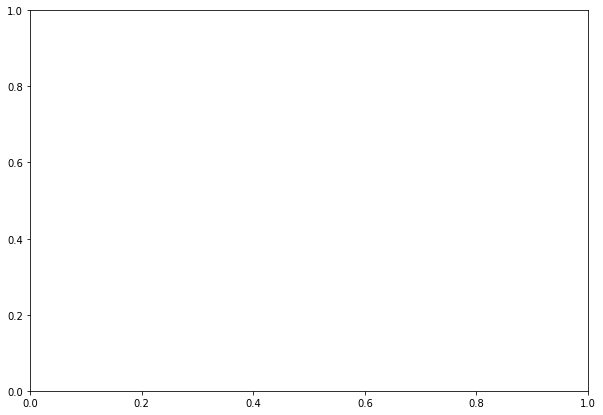

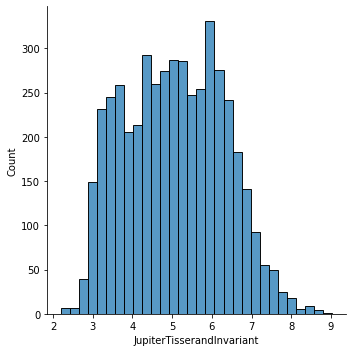

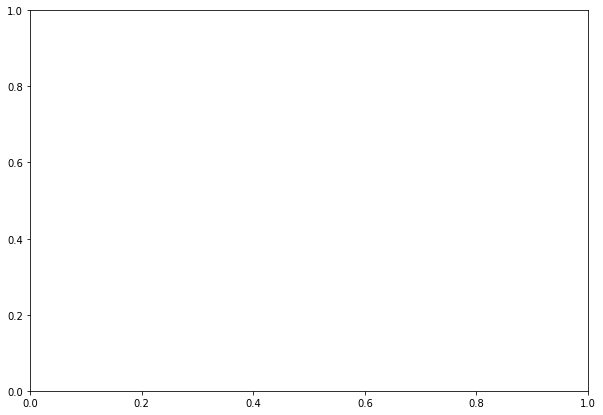

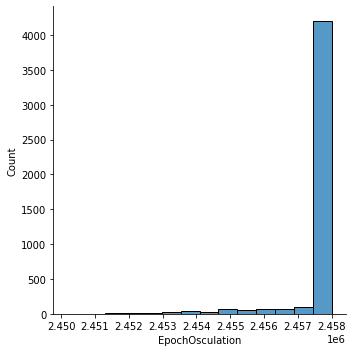

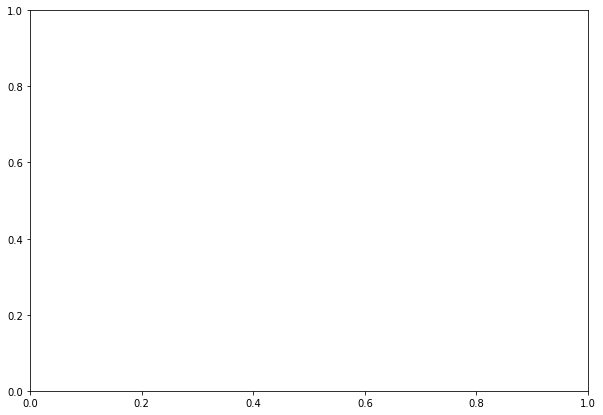

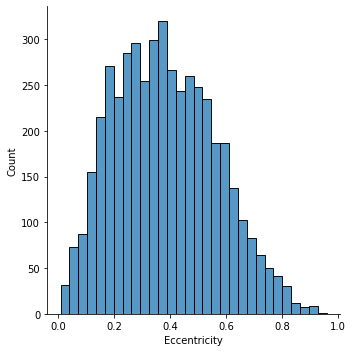

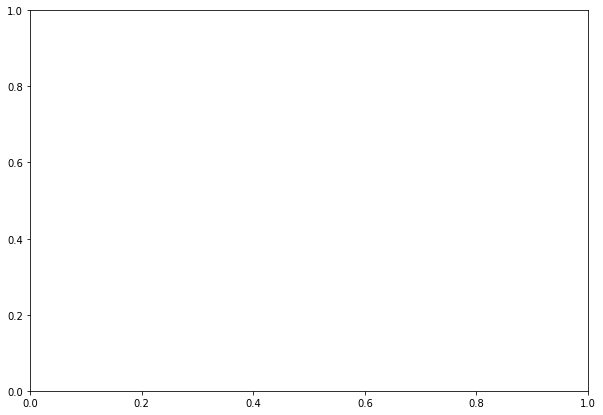

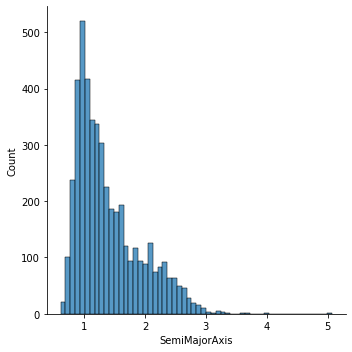

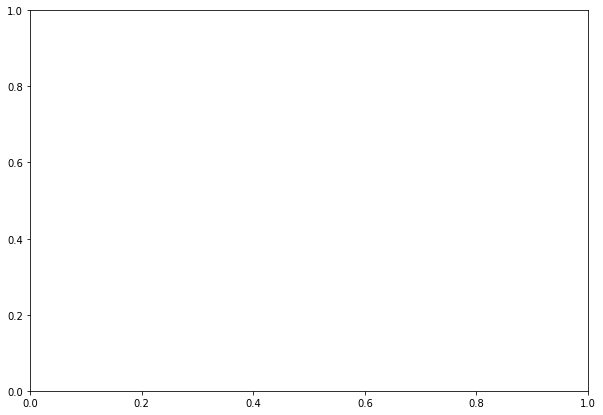

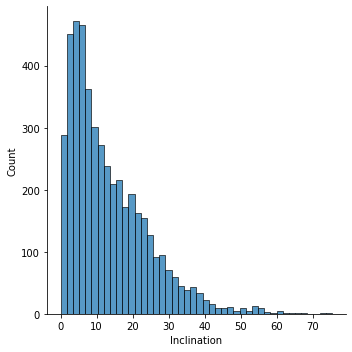

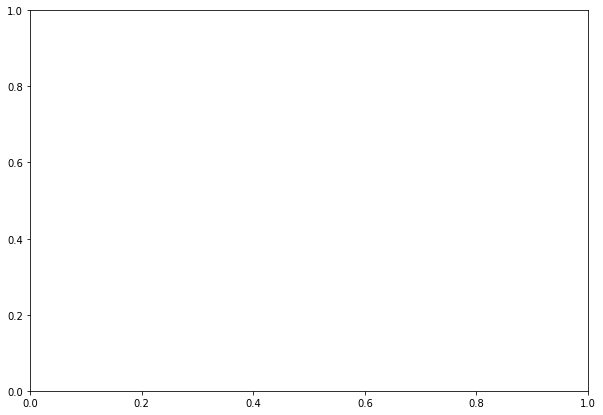

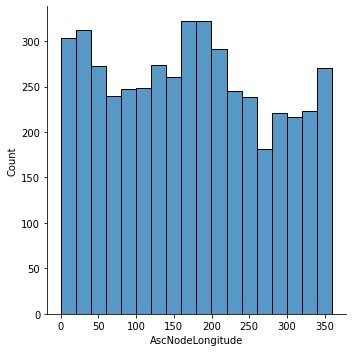

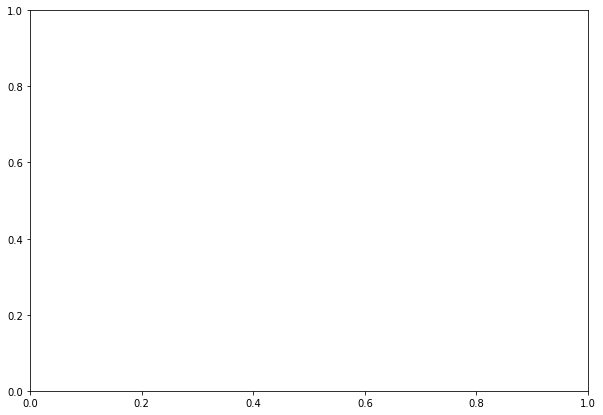

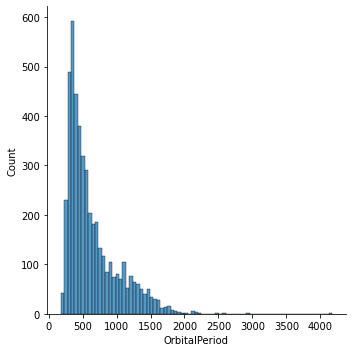

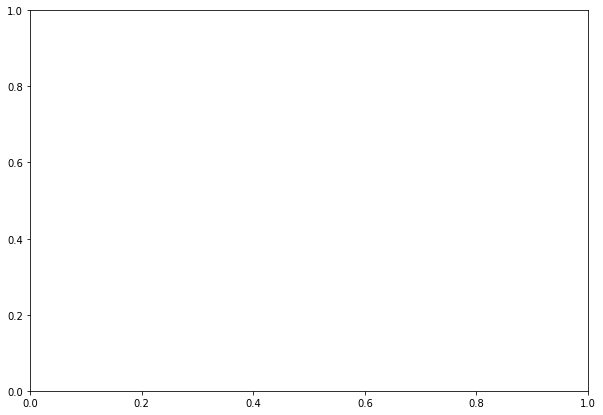

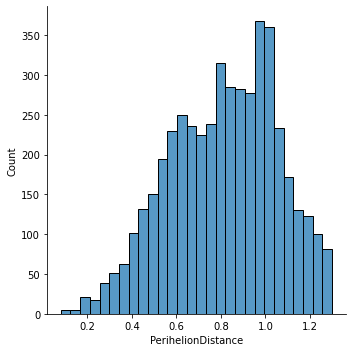

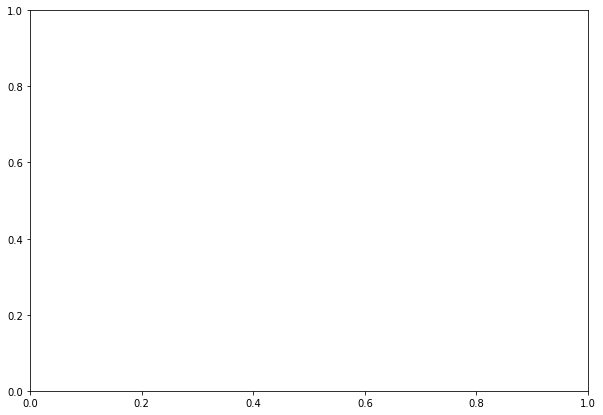

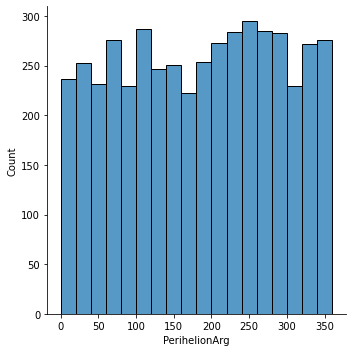

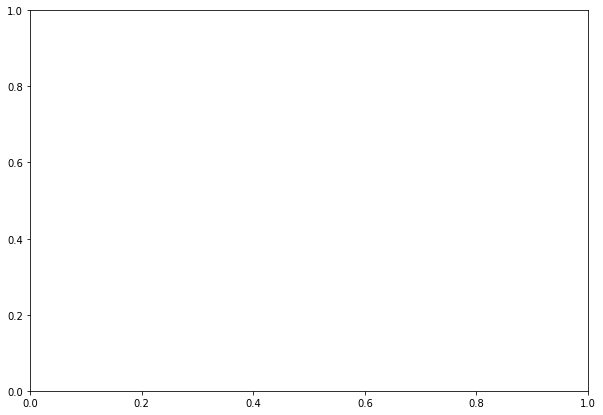

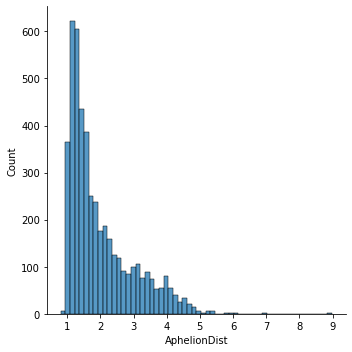

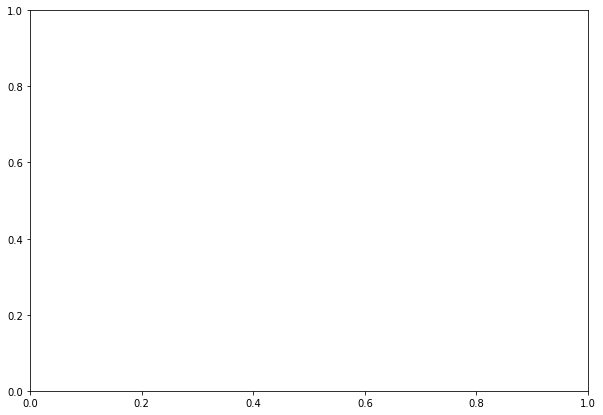

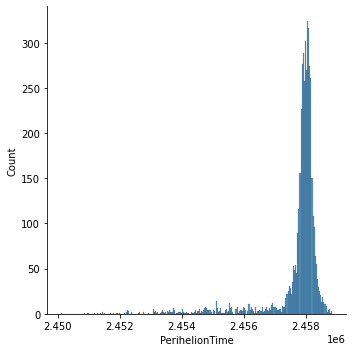

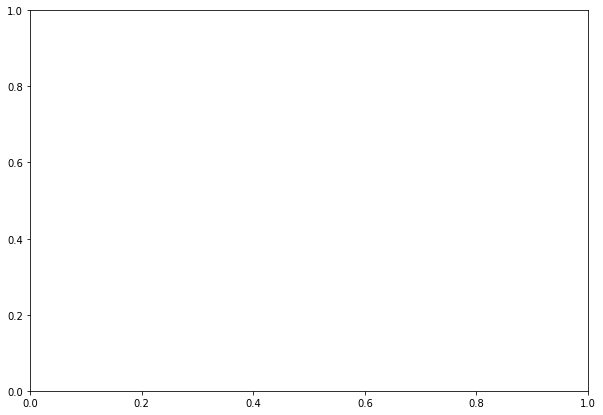

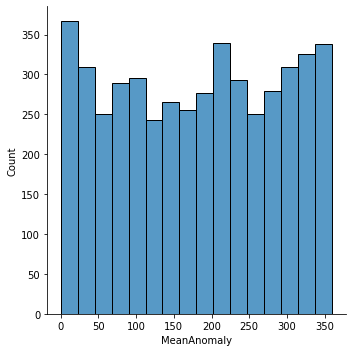

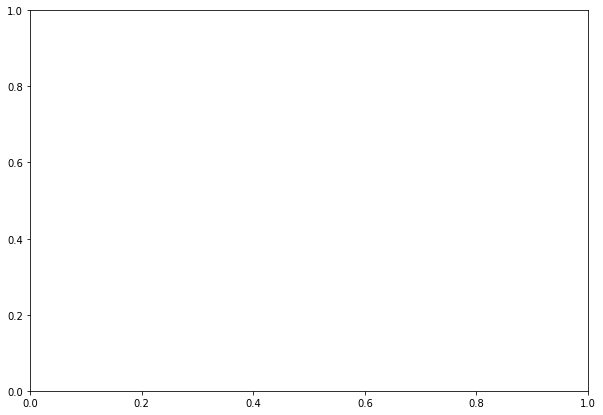

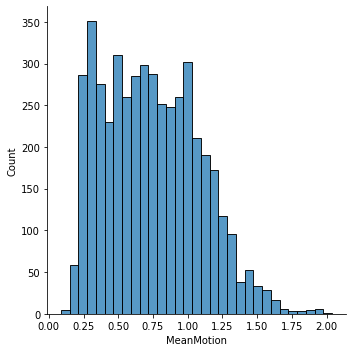

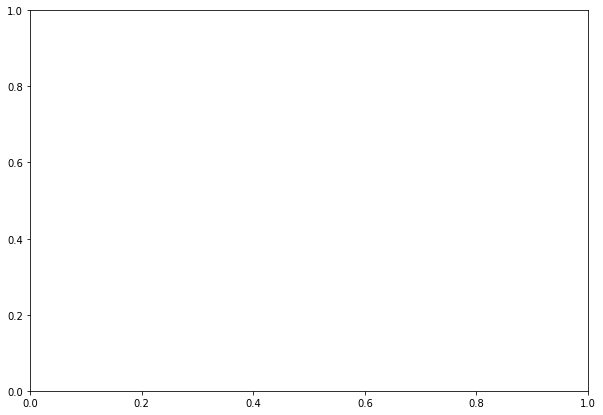

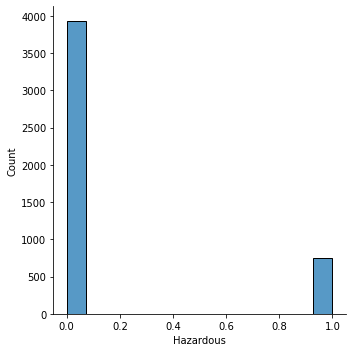

In [113]:
arrayDistPlots = []

arrayDistPlots.insert(1, nasa["NeoReferenceID"])
arrayDistPlots.insert(2, nasa["Name"])
arrayDistPlots.insert(3, nasa["AbsoluteMagnitude"])
arrayDistPlots.insert(4, nasa.query("`EstDiainMiles(min)` < 1")["EstDiainMiles(min)"])
arrayDistPlots.insert(5, nasa.query("`EstDiainMiles(max)` < 2.5")["EstDiainMiles(max)"])
arrayDistPlots.insert(6, nasa["EpochDateCloseApproach"])
arrayDistPlots.insert(7, nasa["RelativeVelocitykmperhr"])
arrayDistPlots.insert(8, nasa["Milesperhour"])
arrayDistPlots.insert(9, nasa["MissDist.(miles)"])
arrayDistPlots.insert(10, nasa.query("`OrbitID` < 200")["OrbitID"])
arrayDistPlots.insert(11, nasa["OrbitUncertainity"])
arrayDistPlots.insert(12, nasa["MinimumOrbitIntersection"])
arrayDistPlots.insert(13, nasa["JupiterTisserandInvariant"])
arrayDistPlots.insert(14, nasa["EpochOsculation"])
arrayDistPlots.insert(15, nasa["Eccentricity"])
arrayDistPlots.insert(16, nasa["SemiMajorAxis"])
arrayDistPlots.insert(17, nasa["Inclination"])
arrayDistPlots.insert(18, nasa["AscNodeLongitude"])
arrayDistPlots.insert(19, nasa["OrbitalPeriod"])
arrayDistPlots.insert(20, nasa["PerihelionDistance"])
arrayDistPlots.insert(21, nasa["PerihelionArg"])
arrayDistPlots.insert(22, nasa["AphelionDist"])
arrayDistPlots.insert(23, nasa["PerihelionTime"])
arrayDistPlots.insert(24, nasa["MeanAnomaly"])
arrayDistPlots.insert(25, nasa["MeanMotion"])
arrayDistPlots.insert(26, nasa["Hazardous"])


for each in arrayDistPlots:
    sns.displot(each)


## Partie 1.5 : Préparation des data pour le model building

### Séparation des features de la target

In [60]:
x = nasa.drop("Hazardous", axis="columns")
y = nasa["Hazardous"]

print(x.shape, y.shape)

(4687, 27) (4687,)


### Train Test Split

In [59]:
splits = train_test_split (x, y, train_size=0.3, stratify=y, random_state=25)

xTrain, xTest, yTrain, yTest = splits

NameError: name 'x' is not defined

## Partie 2A : Model Building avec KNearest Neighors 

In [58]:
knn = KNN(n_neighbors=5, weights="distance", p=1)

knn.fit(xTrain, yTrain)

NameError: name 'xTrain' is not defined

In [95]:
knn.score(xTest, yTest)

0.8850960073148431

#### Définition de la méthode qui permettra d'afficher les matrices de confusion sous la forme d'une heatmap

In [96]:
def show_cm(cm):
    labelsConfusionMap = ["Dangereux", "Non Dangereux"]
    plt.subplots(figsize=(10,7))
    df_cm = pd.DataFrame(cm, labelsConfusionMap, labelsConfusionMap)
    sns.heatmap(df_cm, annot=True, cmap="hot", fmt='g')
    plt.xlabel("Predictions")
    plt.ylabel("Realité")
    plt.title("Matrice de confusion pour KNearestNeighbors")
    plt.show()

### Matrice de confusion

In [97]:
preds = knn.predict(xTest)
cm = confusion_matrix(preds, yTest)
cm

array([[2686,  311],
       [  66,  218]])

### Affichage avec une heatmap

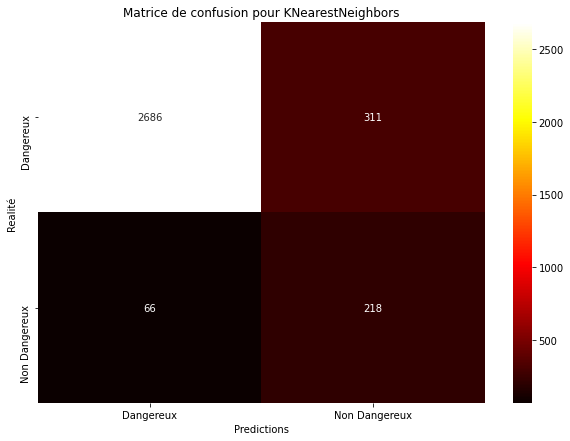

In [98]:
show_cm(cm)

On peut constater ici différentes choses :

#### Dans le cas où l'astéroïde est réellement dangereux :
- Il prédit correctement à ~88.6% que c'est un astéroïde dangereux
- Il se trompe dans ~11.4% des cas il se trompe

Dans ce domaine, 11% d'erreur peut être très risqué

#### Dans le cas où l'astéroïde est non dangereux
- Il prédit un non-danger dans ~70.8% des cas
- Un danger dans 29.2% des cas

Cette situation est moins alarmante et moins risquée, même si elle demanderai plus de travail pour les spécialistes pour une fausse alerte

## 2B Model Building avec SGDClassifier

In [99]:
sgd = SGD(
    alpha = 5,
    n_jobs = 2,
    shuffle = False
)

sgd.fit(xTrain, yTrain)

SGDClassifier(alpha=5, n_jobs=2, shuffle=False)

In [100]:
sgd.score(xTest, yTest)

0.9140505943309967

In [101]:
preds = sgd.predict(xTest)
cm = confusion_matrix(preds, yTest)
cm

array([[2691,  221],
       [  61,  308]])

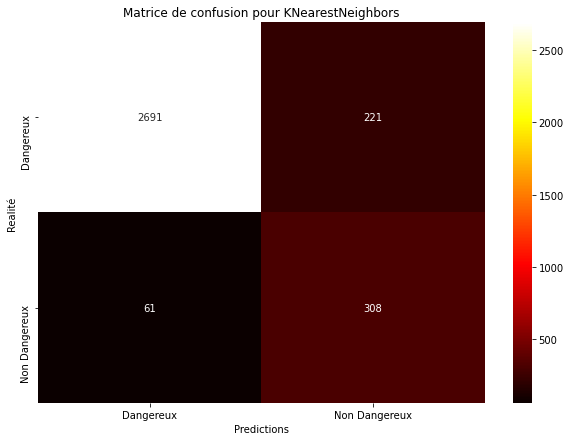

In [102]:
show_cm(cm)

## 2C : Model Building avec Random Forest Classifier

In [103]:
rf = RF(
    
)

rf.fit(xTrain, yTrain)

RandomForestClassifier()

In [104]:
rf.score(xTest, yTest)

0.9908564462054251

In [105]:
preds = knn.predict(xTest)
cm = confusion_matrix(preds, yTest)
cm

array([[2686,  311],
       [  66,  218]])

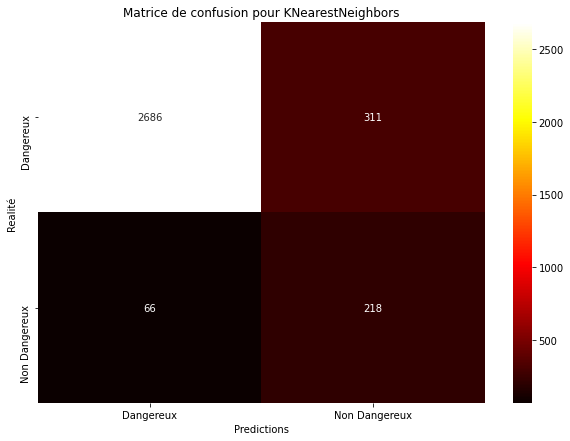

In [106]:
show_cm(cm)

## Partie 3 : Feature Importance

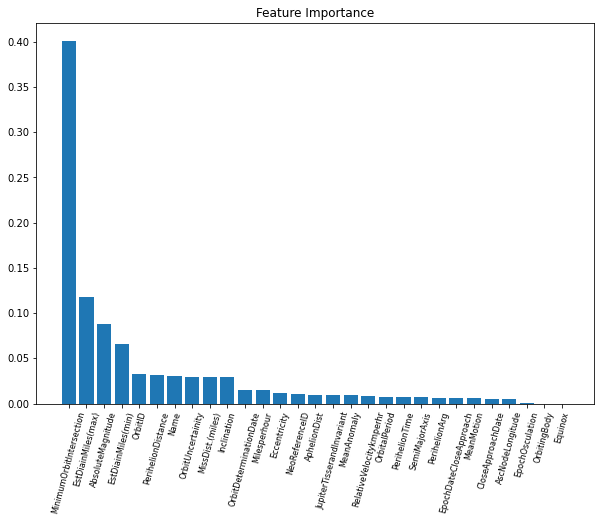

In [107]:
features_importances = rf.feature_importances_

indices = np.argsort(features_importances)[::-1]
names = xTrain.columns
names = [xTrain.columns[i] for i in indices]

plt.subplots(figsize=(10,7))
plt.bar(range(xTest.shape[1]), features_importances[indices])
plt.xticks(range(xTest.shape[1]), names, rotation=75, fontsize = 8)
plt.title("Feature Importance")
plt.show()

On peut cosntater que les features impactant le plus le résultat de prédiction de l'agorithme Random Forest Classifier ne sont pas les features étant les plus correllées

## Partie 4 : Model Reexecution

### 4-1 : Séparation des 5 features importantes de la target

In [108]:
xR = nasa[["MinimumOrbitIntersection", "EstDiainMiles(min)", "EstDiainMiles(max)", "AbsoluteMagnitude", "OrbitID"]] 
yR = nasa["Hazardous"]

print(xR.shape, yR.shape)

(4687, 5) (4687,)


### Train Test Split avec les nouvelles valeurs de X et Y

In [109]:
splitsR = train_test_split (xR, yR, train_size=0.3, stratify=yR, random_state=25)

xRTrain, xRTest, yRTrain, yRTest = splitsR

## Model Reexecution de KNearestNeighbors

In [110]:
knn = KNN(n_neighbors=5, weights="distance", p=1)

knn.fit(xRTrain, yRTrain)

KNeighborsClassifier(p=1, weights='distance')

In [111]:
knn.score(xRTest, yRTest)

0.9844559585492227

In [112]:
preds = knn.predict(xRTest)
cm = confusion_matrix(preds, yRTest)
cm

array([[2738,   37],
       [  14,  492]])

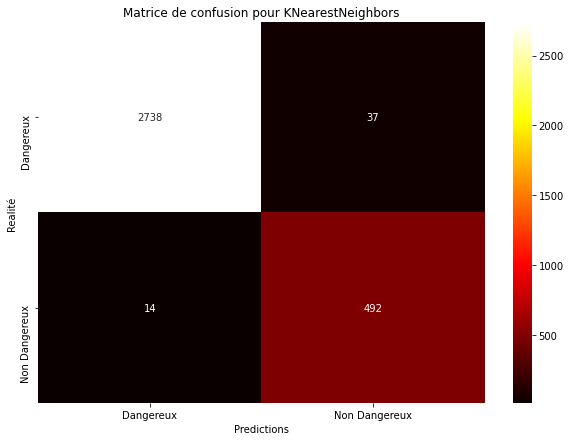

In [113]:

show_cm(cm)

## Model Reexecution de SGDClassifier

In [114]:
sgd = SGD()

sgd.fit(xRTrain, yRTrain)

SGDClassifier()

In [115]:
sgd.score(xRTest, yRTest)

0.9198415117342273

In [116]:
preds = sgd.predict(xRTest)
cm = confusion_matrix(preds, yRTest)
cm

array([[2684,  195],
       [  68,  334]])

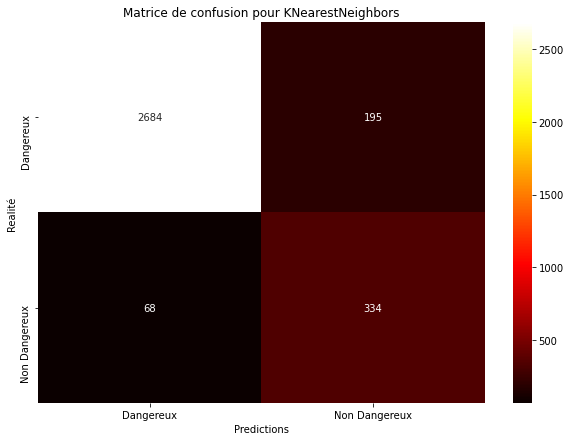

In [117]:
show_cm(cm)

## Model Reexecution avec Random Forest Classifier

In [118]:
rf = RF()
rf.fit(xRTrain, yRTrain)
rf.score(xRTest, yRTest)

0.9929899420908259

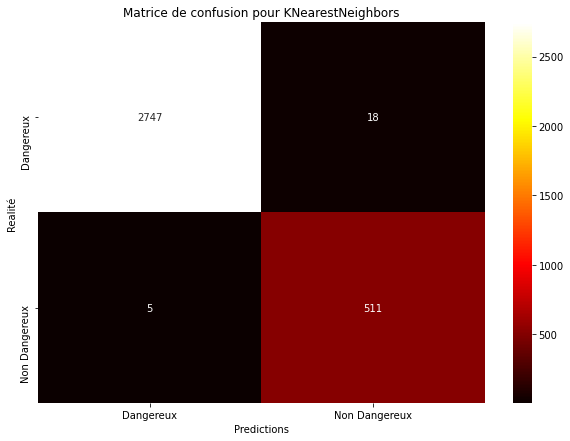

In [119]:
preds = rf.predict(xRTest)
cm =confusion_matrix(preds, yRTest)
show_cm(cm)